# Practice in Python - Graphs, Visualization, and Dashboards

In this section, we will study data creation and visualization, such as:
- Histograms;
- Density and Scatter Plots;
- Box plots;

Learning with libraries: matplotlib, pandas, numpy, and seaborn.

In [67]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

____
# Dataset: Trees

In [3]:
dttrees = pd.read_csv('z_trees.csv')
dttrees.head()
#dttrees.shape: checks how many rows and columns are in the dataset (rows, columns).

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [4]:
#Visualizing the data in a histogram with Numpy
dt_hist = np.histogram(dttrees.iloc[:,1],bins=6)
dt_hist

'''Returns a tuple containing two arrays:
    1. The first array is the count of data in each interval.
    2. The second array contains the limits of the intervals.
'''

'Returns a tuple containing two arrays:\n    1. The first array is the count of data in each interval.\n    2. The second array contains the limits of the intervals.\n'

Text(0.5, 0, 'Height')

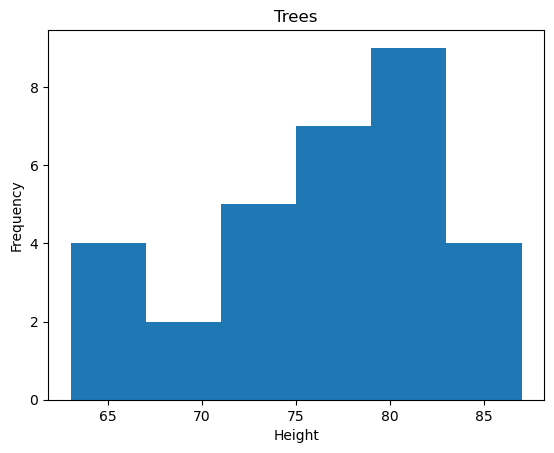

In [5]:
#Visualizing the data in a histogram with matplotlib
plt.hist(dttrees.iloc[:,1], bins=6) #bins=6 divide the data into 6 intervals to construct the histogram.
plt.title('Trees')
plt.ylabel('Frequency')
plt.xlabel('Height')

[Text(0.5, 1.0, 'Trees')]

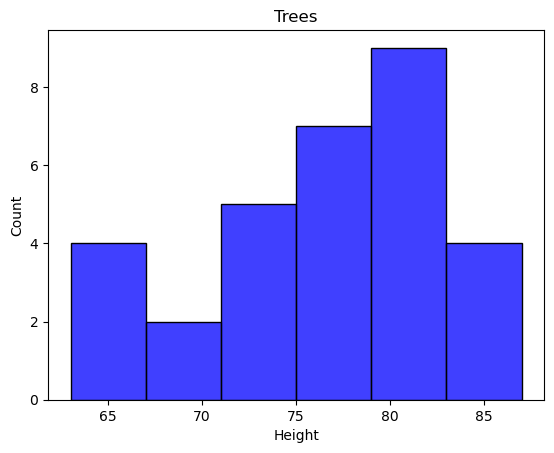

In [6]:
#Visualizing the data in a histogram with seaborn
sns.histplot(dttrees.iloc[:,1], kde=False, bins=6, color='blue').set(title='Trees')

#kde=False does not display the data density line

[Text(0.5, 1.0, 'Trees')]

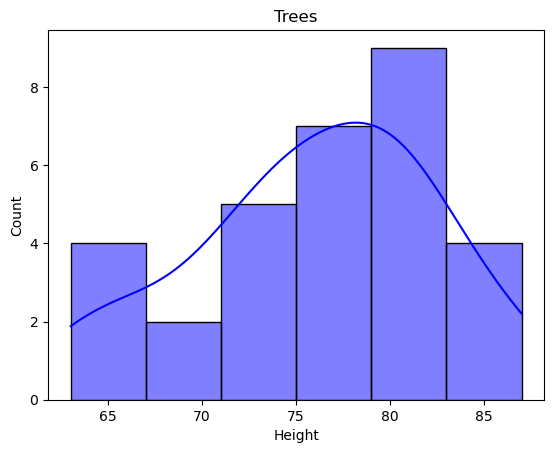

In [7]:
#Visualizing the data in a histogram with a density line with seaborn
sns.histplot(dttrees.iloc[:,1], kde=True, bins=6, color='blue').set(title='Trees')

[Text(0.5, 1.0, 'Trees')]

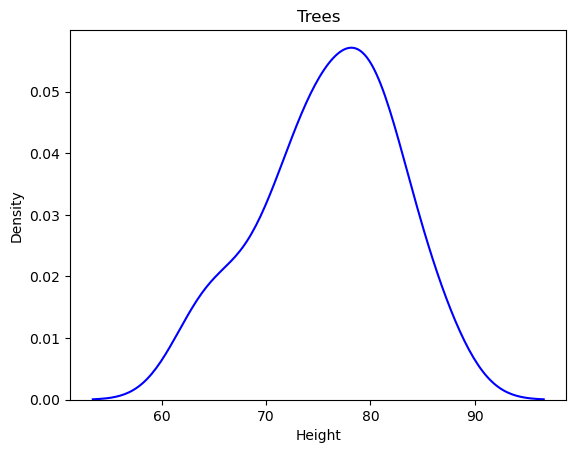

In [8]:
#Visualizing only the density of the data using the kdeplot method
sns.kdeplot(dttrees.iloc[:,1], color='blue').set(title='Trees')

'If you specify only the x and y axes without setting a marker, the plot will be drawn as a line.\n    Example: plt.scatter(x=dttrees.Girth, y=dttrees.Volume)\n'

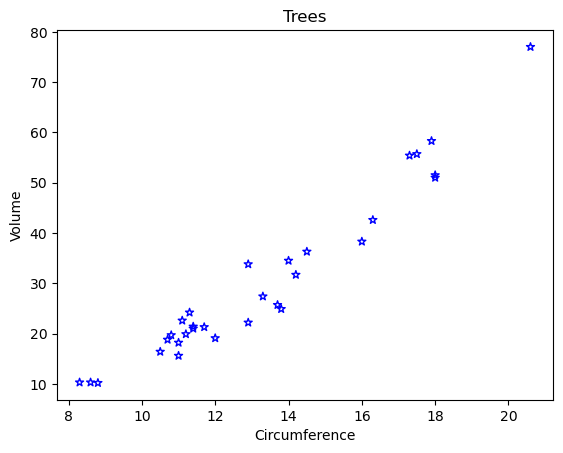

In [9]:
#Using scatter plots to compare two numerical variables

#Example matplotlib
plt.scatter(x=dttrees.Girth, y=dttrees.Volume, color='Blue', facecolors='none', marker='*')
plt.title('Trees')
plt.xlabel('Circumference')
plt.ylabel('Volume')

'''If you specify only the x and y axes without setting a marker, the plot will be drawn as a line.
    Example: plt.scatter(x=dttrees.Girth, y=dttrees.Volume)
'''

<Axes: xlabel='Girth', ylabel='Volume'>

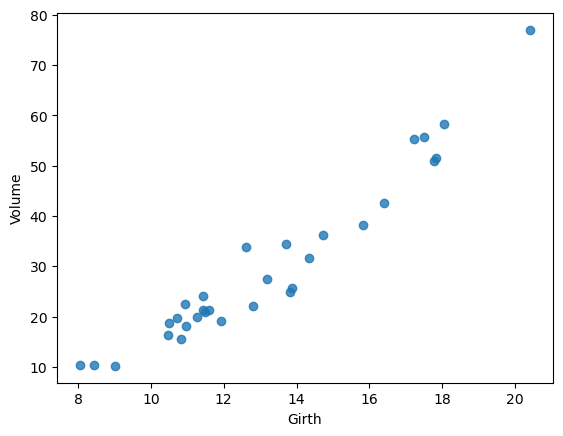

In [10]:
#Example seaborn
sns.regplot(x=dttrees.Girth, y=dttrees.Volume, data=dttrees, x_jitter=0.3, fit_reg=False)

#(x_jitter=0.3) adds a random horizontal displacement to the data points along the x-axis, helping to avoid point overlap and making the data visualization clearer.
#(fit_reg=False) defines whether you want to see the trend line of the data.

(array([ 5., 10.,  4.,  4.,  2.,  0.,  4.,  1.,  0.,  1.]),
 array([10.2 , 16.88, 23.56, 30.24, 36.92, 43.6 , 50.28, 56.96, 63.64,
        70.32, 77.  ]),
 <BarContainer object of 10 artists>)

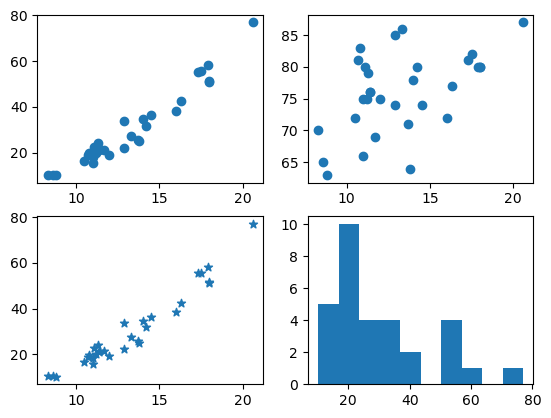

In [11]:
#Grouping multiple plots into a single visualization

#We use (plt.figure()) to create the figure that will contain the plots.
#We use (plt.subplot(row, column, position)) to allocate the plots in the positions of the figure.
plt.figure(1)

#First plot (scatter between girth x volume)
plt.subplot(2,2,1)
plt.scatter(dttrees.Girth, dttrees.Volume)

#Second plot (scatter between girth x height)
plt.subplot(2,2,2)
plt.scatter(dttrees.Girth, dttrees.Height)

#Third plot (scatter plot with marker)
plt.subplot(2,2,3)
plt.scatter(dttrees.Girth, dttrees.Volume, marker='*')

#Fourth plot (histogram)
plt.subplot(2,2,4)
plt.hist(dttrees.Volume)

Text(0.5, 0, 'Volume')

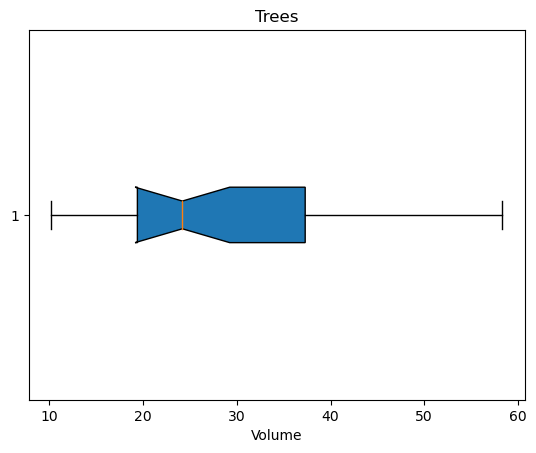

In [21]:
#Generating a boxplot graph with the "volume" column from the trees database

plt.boxplot(dttrees.Volume, vert= False, showfliers= False, notch= True, patch_artist = True)
# vert=False -> Horizontal graph
# showfliers=False -> Show outliers points
# notch=True -> Cuts the graph near the median
# patch_artist=True -> Fills/paints the graph
plt.title('Trees')
plt.xlabel('Volume')

Text(0.5, 0, 'Data')

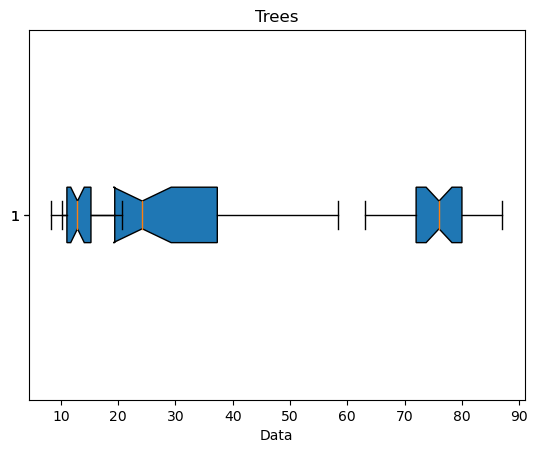

In [24]:
#Generating a boxplot graph of all columns from the trees database.
plt.boxplot(dttrees.Volume, vert= False, showfliers= True, notch= True, patch_artist= True)
plt.boxplot(dttrees.Girth, vert= False, showfliers= True, notch= True, patch_artist= True)
plt.boxplot(dttrees.Height, vert= False, showfliers= True, notch= True, patch_artist= True)

plt.title('Trees')
plt.xlabel('Data')

Text(0.5, 1.0, 'Trees')

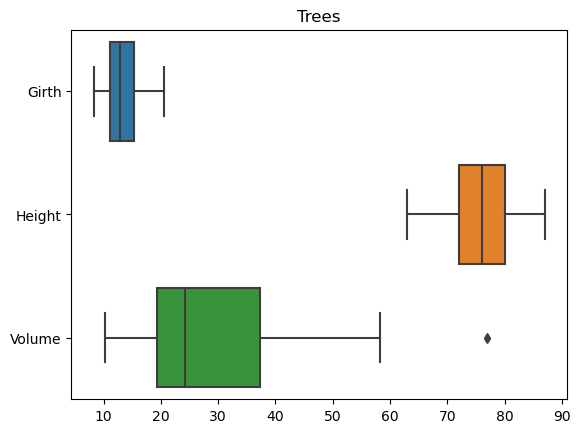

In [35]:
#Using boxplot graphs with the Seaborn library

sns.boxplot(data= dttrees, orient= 'h').set_title('Trees')
# data=dttrees -> We can plot the graph for a specific column only (example: data=dttrees.Volume)

----
# Dataset: CO₂

In [13]:
dtco2 = pd.read_csv('z_co2.csv')
dtco2.head()

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


In [14]:
#Creating legends in scatter plots

#Storing the columns CONC and UPTAKE in two variables
x = dtco2.conc
y = dtco2.uptake

#Storing the elements of the column TREATMENT in one variable and in a list (which will return only two distinct elements)
t_unique = list(set(dtco2.Treatment))
t_unique


['nonchilled', 'chilled']

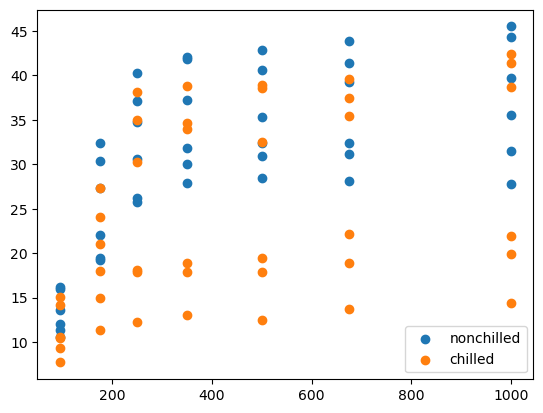

In [15]:
#We iterate through the elements of the column treatment (02 distinct ones) and create the scatter plot.

for i in range(len(t_unique)):
    index = dtco2.Treatment == t_unique[i]
    plt.scatter(x[index],y[index], label= t_unique[i])
plt.legend(loc='lower right')

<Axes: xlabel='conc', ylabel='uptake'>

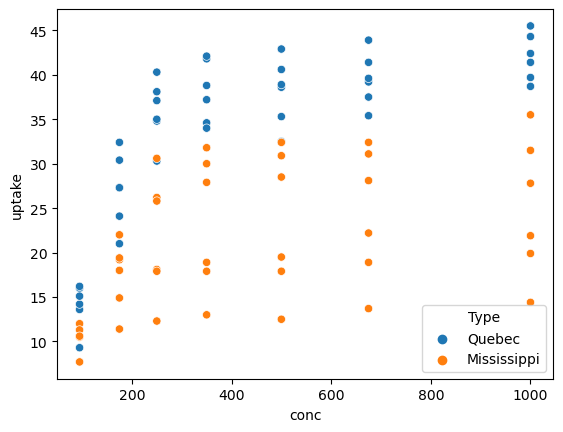

In [58]:
#Using the Seaborn library to generate a scatter plot between the origins of the plants (Quebec & Mississippi).

sns.scatterplot(data=dtco2, x='conc', y='uptake', hue='Type')
# hue='Type' -> assigns different colors to the points on the graph based on the values in the 'Type' column

Text(0.5, 1.0, 'Mississippi')

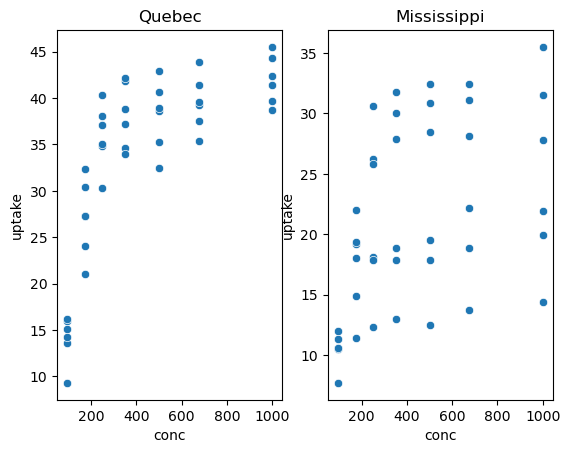

In [59]:
#Filtering data by region and Type
quebec_filter = dtco2.loc[dtco2['Type'] == 'Quebec']
mississippi_filter = dtco2.loc[dtco2['Type'] == 'Mississippi']

#Creating subplots based on the view of each region
plt.figure()

plt.subplot(1,2,1) #(rows, columns, position)
sns.scatterplot(x= quebec_filter.conc, y= quebec_filter.uptake)
plt.title('Quebec')

plt.subplot(1,2,2) #(rows, columns, position)
sns.scatterplot(x= mississippi_filter.conc, y= mississippi_filter.uptake)
plt.title('Mississippi')


Text(0.5, 1.0, 'Non-Chilled')

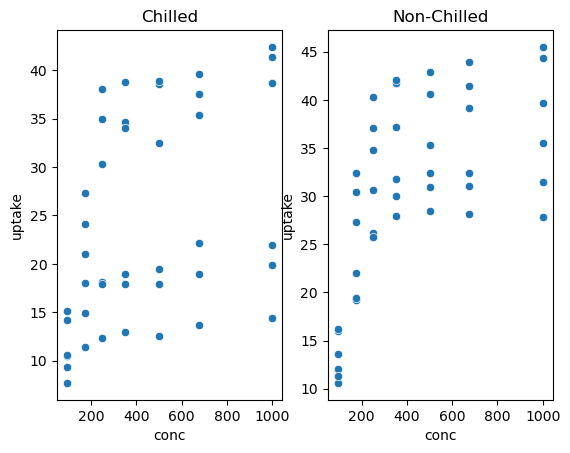

In [61]:
#Filtering data by Chilled & NonChilled
chilled_filter = dtco2.loc[dtco2['Treatment'] == 'chilled']
nonchilled_filter = dtco2.loc[dtco2['Treatment'] == 'nonchilled']

#Creating subplots
plt.figure()

plt.subplot(1,2,1) #(rows, columns, position)
sns.scatterplot(x=chilled_filter.conc, y=chilled_filter.uptake).set_title('Chilled')

plt.subplot(1,2,2) #(rows, columns, position)
sns.scatterplot(x=nonchilled_filter.conc, y=nonchilled_filter.uptake).set_title('Non-Chilled')

----
# Dataset: Insect

In [26]:
dtinsect = pd.read_csv('z_insect.csv')
dtinsect.head()

#Dataset with two columns:
    # 'count' represents the number of times the spray was used
    # 'spray' represents the type of spray used

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A


In [28]:
#Grouping the number of uses by spray
dtinsect_gb = dtinsect.groupby(['spray'])['count'].sum()
dtinsect_gb

spray
A    174
B    184
C     25
D     59
E     42
F    200
Name: count, dtype: int64

<Axes: xlabel='spray'>

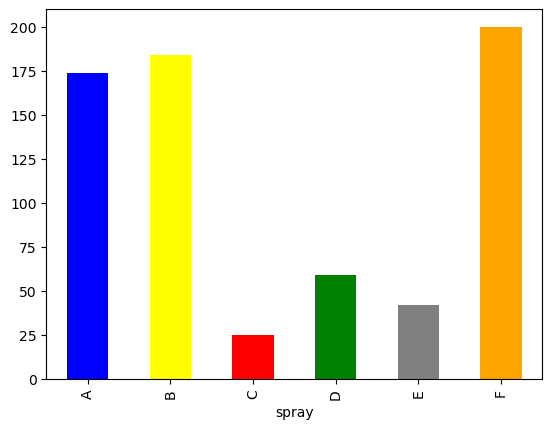

In [30]:
#Generating a bar chart of the grouped data

dtinsect_gb.plot.bar(color= ['blue', 'yellow','red', 'green', 'gray', 'orange'])
#I set a list of colors to color the bars of the chart

Text(0, 0.5, 'Type of Spray')

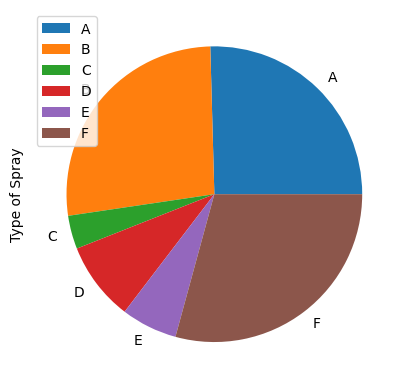

In [33]:
#Viewing the same data on a pie chart
dtinsect_gb.plot.pie(legend= True)
plt.ylabel('Type of Spray')

____
# Dataset: Chicken

In [38]:
dtchicken = pd.read_csv('z_chicken.csv')
dtchicken.head()

#The database provides information on food used to feed chickens.
    # 'Weight' -> Represents the weight of the given food
    # 'Feed' -> Type of food

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean


In [39]:
#Grouping the food data by the offered weight.
dtchicken_gb = dtchicken.groupby(['feed'])['weight'].sum()
dtchicken_gb

feed
casein       3883
horsebean    1602
linseed      2625
meatmeal     3046
soybean      3450
sunflower    3947
Name: weight, dtype: int64

In [43]:
#Using Pandas to visualize the database with filters (Test)
dtchicken_loc_horsebean = dtchicken.loc[dtchicken['feed'] == 'horsebean']
dtchicken_loc_horsebean

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
5,168,horsebean
6,108,horsebean
7,124,horsebean
8,143,horsebean
9,140,horsebean


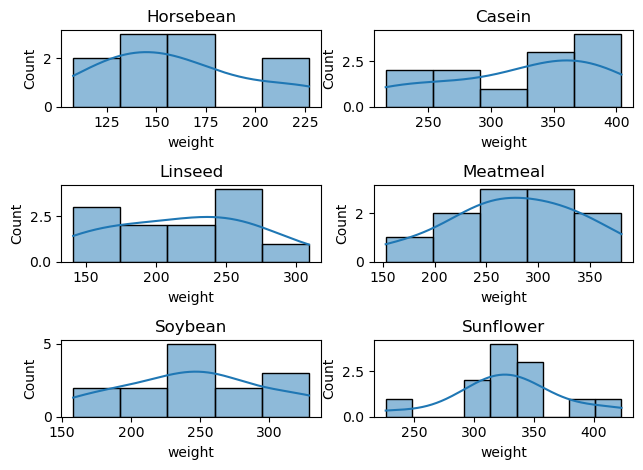

In [47]:
#Using the Seaborn library to generate histograms and density plots
plt.figure()

plt.subplot(3,2,1) #(rows, columns, position)
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'horsebean'].weight, kde= True).set_title(label= 'Horsebean')

plt.subplot(3,2,2) #(rows, columns, position)
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'casein'].weight, kde= True).set_title(label= 'Casein')

plt.subplot(3,2,3) #(rows, columns, position)
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'linseed'].weight, kde= True).set_title(label= 'Linseed')

plt.subplot(3,2,4) #(rows, columns, position)
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'meatmeal'].weight, kde= True).set_title(label= 'Meatmeal')

plt.subplot(3,2,5) #(rows, columns, position)
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'soybean'].weight, kde= True).set_title(label= 'Soybean')

plt.subplot(3,2,6) #(rows, columns, position)
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'sunflower'].weight, kde= True).set_title(label= 'Sunflower')

#kde=True -> includes a kernel density estimate, providing a smooth curve that represents the underlying data distribution.

plt.tight_layout()
#Adjust the layout of the graphs to prevent overlapping.

Text(0.5, 1.0, 'Horsebean Separated')

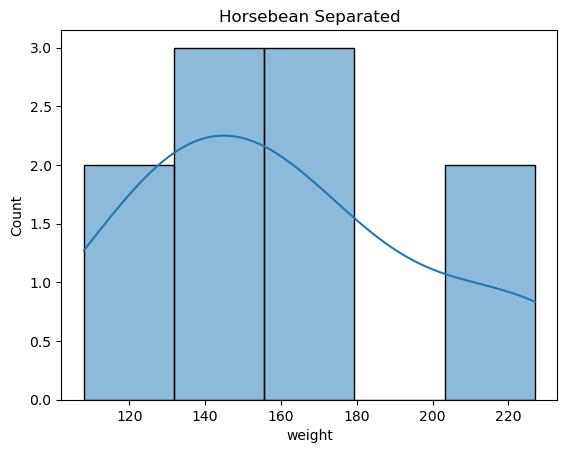

In [50]:
#Checking scatter plots and histograms separately.
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'horsebean'].weight, kde= True).set_title('Horsebean Separated')


Text(0.5, 1.0, 'Casein Separated')

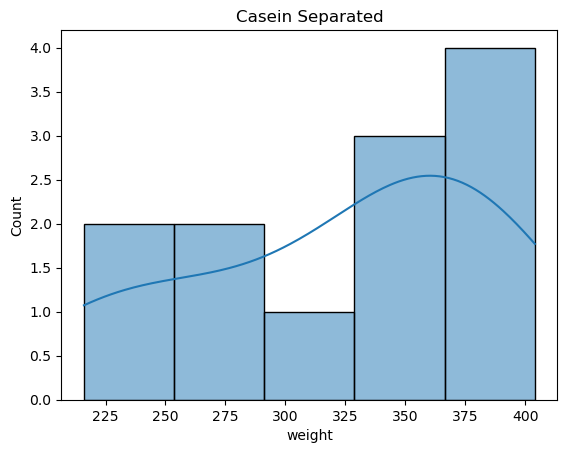

In [52]:
#Checking scatter plots and histograms separately.
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'casein'].weight, kde=True).set_title('Casein Separated')


Text(0.5, 1.0, 'Linseed Separated')

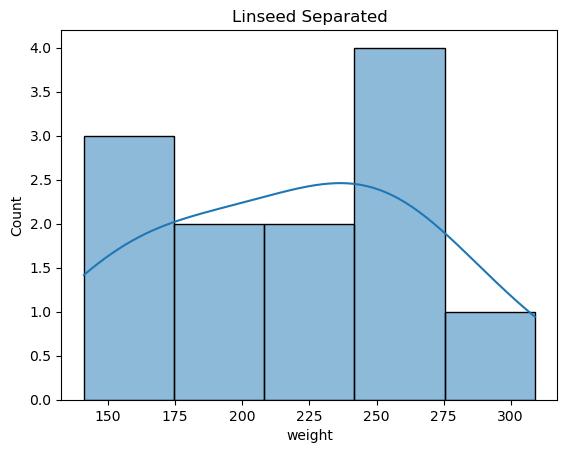

In [53]:
#Checking scatter plots and histograms separately.
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'linseed'].weight, kde=True).set_title('Linseed Separated')


Text(0.5, 1.0, 'Meatmeal Separated')

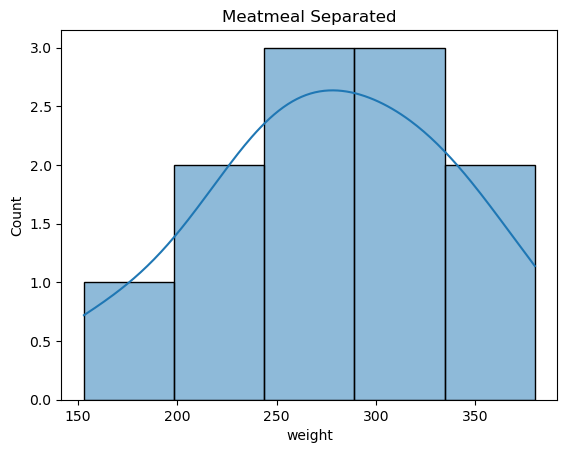

In [54]:
#Checking scatter plots and histograms separately.
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'meatmeal'].weight, kde= True).set_title('Meatmeal Separated')


Text(0.5, 1.0, 'Soybean Separated')

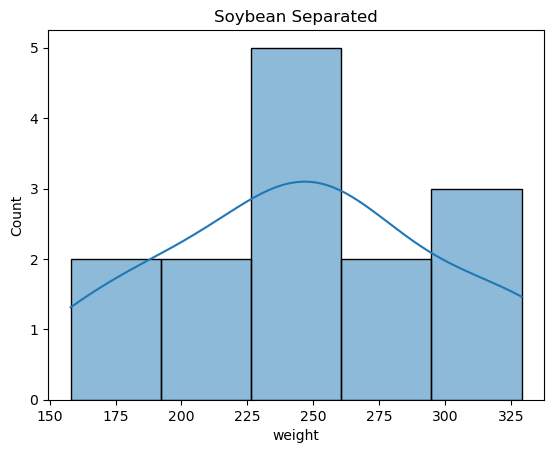

In [55]:
#Checking scatter plots and histograms separately.
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'soybean'].weight, kde= True).set_title('Soybean Separated')


Text(0.5, 1.0, 'Sunflower Separated')

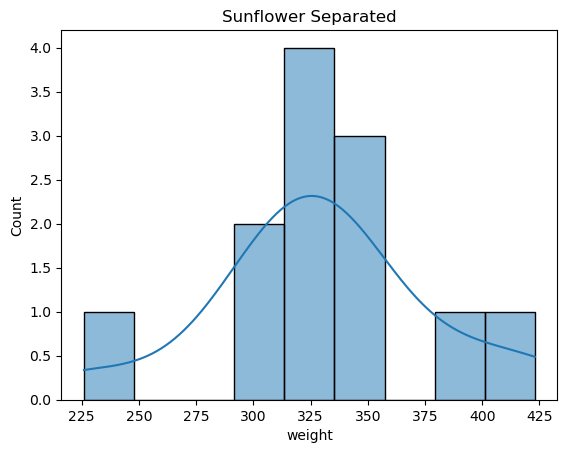

In [56]:
#Checking scatter plots and histograms separately.
sns.histplot(dtchicken.loc[dtchicken['feed'] == 'sunflower'].weight, kde= True).set_title('Sunflower Separated')

----
# Dataset: Esoph

In [62]:
dtesoph = pd.read_csv('z_esoph.csv')
dtesoph.head()

# Data regarding the number of esophageal cancer cases:
    #We have columns for Age, Alcohol Consumption, Tobacco Consumption, Number of Cases, and Number of Controls

,agegp,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27


c:\Users\Lucas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


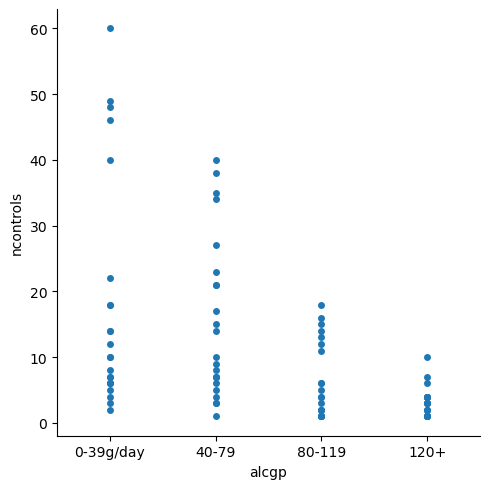

In [64]:
#Analyzing the Number of Controls (y-axis) by the amount of alcohol consumed (x-axis)

sns.catplot(x='alcgp', y='ncontrols', data=dtesoph, jitter = False)
#jitter -> adds a small random displacement to the points along the x or y axis, helping to visualize the density of points better when they are very close together
    #In this case, I'm disabling this displacement (False) because it's not beneficial for this visualization!

c:\Users\Lucas\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


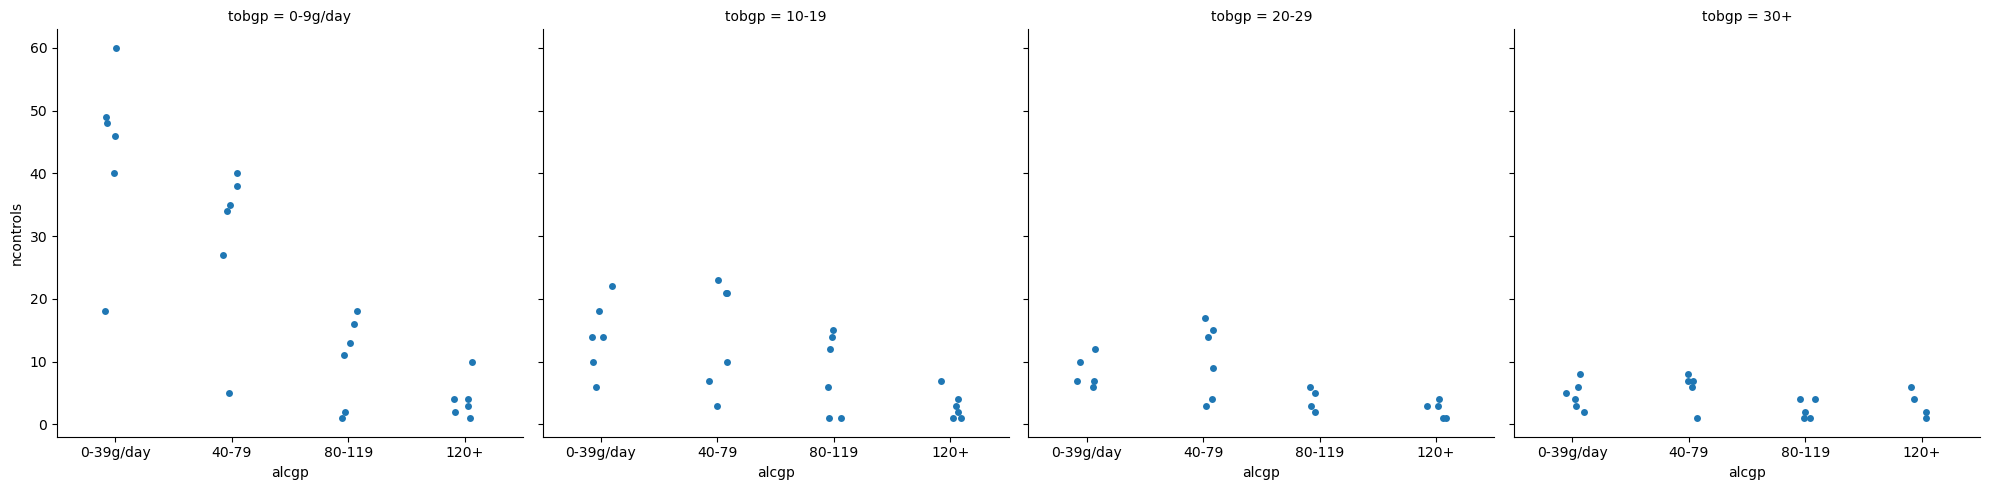

In [65]:
#Adicionando na visualização o agrupamento do consumo de tabaco
sns.catplot(x='alcgp',y='ncontrols',data=dtesoph, col='tobgp')

#In this visualization, we separate into 4 graphs based on tobacco consumption (0-9g... 10-19...).
    #Within each tobacco consumption graph, we visualize alcohol consumption/Number of controls.

#This graph allows us to see the different alcohol consumptions among the different tobacco consumptions.

----
# Dataset: Orchard

In [66]:
dtorchard = pd.read_csv('z_orchard.csv')
dtorchard.head()

,decrease,rowpos,colpos,treatment
0,57,1,1,D
1,95,2,1,E
2,8,3,1,B
3,69,4,1,H
4,92,5,1,G


Text(0.5, 0, 'Colpos')

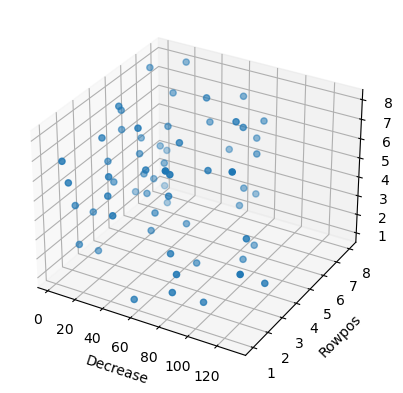

In [69]:
#Creating a 3D graph
object = plt.figure()
axis = object.add_subplot(1,1,1, projection= '3d')

axis.scatter(dtorchard.decrease, dtorchard.rowpos, dtorchard.colpos)
axis.set_xlabel('Decrease')
axis.set_ylabel('Rowpos')
axis.set_zlabel('Colpos')